# 라이브러리 불러오기

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [2]:
# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기
- EDA 및 전처리가 완료된 df_final3.csv 데이터 불러옴.

In [4]:
data = pd.read_csv('df_final3.csv')
df = data.copy() #원본 데이터

In [5]:
print(df.shape)
display(df.head())
display(df.tail())
print(df.info())

(864747, 44)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,17,1997-02-28,1997,...,1999,2,1999-02-01,7.75,0,0.172105,0.118196,0.055178,1,1
1,1000935004,Hairline Inc.,Vancouver,WA,98663,WELLS FARGO BANK NATL ASSOC,SD,14,1997-04-08,1997,...,1999,2,1999-02-01,7.75,0,0.090095,0.134566,0.055910,3,2
2,1003535008,Jason A. Philbrook,Rockland,ME,4841,KEYBANK NATIONAL ASSOCIATION,OH,18,1999-01-11,1999,...,1999,2,1999-02-01,7.75,0,0.041237,0.213874,0.051896,5,2
3,1009994000,"ARROW ENTERPRISE, INC.",BILLINGS,MT,59101,WESTERN SECURITY BANK,MT,5,1997-03-04,1997,...,1999,2,1999-02-01,7.75,0,0.148380,0.209033,0.057460,3,1
4,1011904005,"ROBIN E. JONES, D.D.S.",TACOMA,WA,98404,KEYBANK NATIONAL ASSOCIATION,OR,8,1997-03-05,1997,...,1999,2,1999-02-01,7.75,0,0.094218,0.134566,0.055910,3,2


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
864742,9022713002,"BJORK, LAURA BEAUTY CONSULTANT",DALE CITY,VA,22193,MANUFACTURERS & TRADERS TR CO,MD,1,1996-02-21,1996,...,1996,2,1996-02-01,8.25,0,0.104331,0.139452,0.056099,3,1
864743,9035193000,"PROFESSIONALS FOR NONPROFITS,I",NEW YORK,NY,10022,BANCO POPULAR NORTH AMERICA,NY,10,1996-02-26,1996,...,1996,2,1996-02-01,8.25,0,0.094630,0.103363,0.066158,3,1
864744,9256453010,NORTHAIRE MARKET INC,SHAKOPEE,MN,55379,FIDELITY BANK,MN,20,1996-05-07,1996,...,1996,2,1996-02-01,8.25,0,0.066200,0.133574,0.063179,3,2
864745,9459933001,COMPUTER RENAISSANCE,CARY,NC,27511,FIRST-CITIZENS BK & TR CO,NC,17,1996-08-15,1996,...,1996,2,1996-02-01,8.25,0,0.187560,0.111641,0.060808,1,1
864746,7377094002,NORTHLAND DATACOMM CO,MINNEAPOLIS,MN,55311,BMO HARRIS BK NATL ASSOC,IL,20,2004-04-22,2004,...,2014,12,2014-12-01,3.25,0,0.066200,0.133574,0.063179,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864747 entries, 0 to 864746
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      864747 non-null  int64  
 1   Name               864747 non-null  object 
 2   City               864747 non-null  object 
 3   State              864747 non-null  object 
 4   Zip                864747 non-null  int64  
 5   Bank               864747 non-null  object 
 6   BankState          864747 non-null  object 
 7   NAICS              864747 non-null  int64  
 8   ApprovalDate       864747 non-null  object 
 9   ApprovalFY         864747 non-null  int64  
 10  Term               864747 non-null  int64  
 11  NoEmp              864747 non-null  int64  
 12  NewExist           864747 non-null  int64  
 13  CreateJob          864747 non-null  int64  
 14  RetainedJob        864747 non-null  int64  
 15  FranchiseCode      864747 non-null  int64  
 16  Ur

# EDA
- 데이터 구조 확인
- 중복된 행 여부 확인
- 기술통계량 확인
- 결측치 확인
- 이상치 확인
- 상관계수 확인
- 변수별로 분포 확인

채무불이행 집단(MIS_Status == 1)만 가지고 EDA 진행한다.

## 1. 데이터 구조 확인

In [9]:
# 채무불이행 데이터로 축소
df1 = df[df['MIS_Status']==1]

print(df1.shape)
display(df1.head())
display(df1.tail())
df1.info()

(148720, 44)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
12,1052224009,FAMILY CARPET CLEANING,NEW CASTLE,DE,19720,"PNC BANK, NATIONAL ASSOCIATION",DE,2,1997-03-20,1997,...,1999,2,1999-02-01,7.75,0,0.080798,0.202947,0.073669,3,2
55,1343924007,CONTRACT CONNECTIONS INDUSTRIE,HATBORO,PA,19040,"PNC BANK, NATIONAL ASSOCIATION",DE,1,1997-06-12,1997,...,1999,2,1999-02-01,7.75,0,0.114305,0.114305,0.051954,3,1
76,1409054010,PRECISION TUNE AUTO SERVICE CE,JACKSONVILLE,FL,32208,REGIONS BANK,FL,13,1997-07-11,1997,...,1999,2,1999-02-01,7.75,0,0.097000,0.104862,0.071389,3,2
157,1621534009,JOSIES RESTAURANT,HARTSVILLE,SC,29550,WELLS FARGO BANK NATL ASSOC,NC,14,1997-10-16,1998,...,1999,2,1999-02-01,7.75,0,0.089667,0.204418,0.062336,3,2
183,1682194007,"STEPHEN & ASSOCIATES BUILDERS,",OKLAHOMA CITY,OK,73116,BANK OF OKLAHOMA A DIVISION OF,OK,2,1997-11-17,1998,...,1999,2,1999-02-01,7.75,0,0.040217,0.109475,0.063408,5,2


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
864639,8622813007,"D & C CLEANERS, INC.",BOROUGH PARK,NY,11219,"TD BANK, NATIONAL ASSOCIATION",DE,13,1995-08-29,1995,...,1996,2,1996-02-01,8.25,0,0.103363,0.103363,0.066158,3,2
864648,8706353008,"THE PRINTING PROFESSIONALS,INC",CRANBURY,NJ,8534,WELLS FARGO BANK NATL ASSOC,SD,17,1995-10-16,1996,...,1996,2,1996-02-01,8.25,0,0.194471,0.137851,0.067772,1,1
864696,8922133006,DAD'S INC.,SALT LAKE CITY,UT,84115,BANK OF THE WEST,UT,5,1996-01-11,1996,...,1996,2,1996-02-01,8.25,0,0.142576,0.141974,0.052139,1,1
864699,8925423005,"GLOBAL DRUGS, INC.",BRONX,NY,10457,HSBC BK USA NATL ASSOC,VA,17,1996-01-12,1996,...,1996,2,1996-02-01,8.25,0,0.192212,0.103363,0.066158,1,1
864702,8934663009,"DAEDALUS RESEARCH, INC.",NORTH LOGAN,UT,84323,CACHE VALLEY BANK,UT,10,1996-01-16,1996,...,1996,2,1996-02-01,8.25,0,0.114728,0.141974,0.052139,3,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148720 entries, 12 to 864702
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      148720 non-null  int64  
 1   Name               148720 non-null  object 
 2   City               148720 non-null  object 
 3   State              148720 non-null  object 
 4   Zip                148720 non-null  int64  
 5   Bank               148720 non-null  object 
 6   BankState          148720 non-null  object 
 7   NAICS              148720 non-null  int64  
 8   ApprovalDate       148720 non-null  object 
 9   ApprovalFY         148720 non-null  int64  
 10  Term               148720 non-null  int64  
 11  NoEmp              148720 non-null  int64  
 12  NewExist           148720 non-null  int64  
 13  CreateJob          148720 non-null  int64  
 14  RetainedJob        148720 non-null  int64  
 15  FranchiseCode      148720 non-null  int64  
 16  U

### 필요없는 변수 지우기

In [10]:
df1 = df1.drop(['Year','Month','DATE','Density','Upper_Threshold','Lower_Threshold','Label'], axis=1)
df1.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate2,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
12,1052224009,FAMILY CARPET CLEANING,NEW CASTLE,DE,19720,"PNC BANK, NATIONAL ASSOCIATION",DE,2,1997-03-20,1997,...,2003-03-09,0,0,0,0,1,50.0,7.75,0,2
55,1343924007,CONTRACT CONNECTIONS INDUSTRIE,HATBORO,PA,19040,"PNC BANK, NATIONAL ASSOCIATION",DE,1,1997-06-12,1997,...,2004-10-29,1,0,0,0,3,75.0,7.75,0,1
76,1409054010,PRECISION TUNE AUTO SERVICE CE,JACKSONVILLE,FL,32208,REGIONS BANK,FL,13,1997-07-11,1997,...,2001-11-14,0,0,0,0,3,75.0,7.75,0,2
157,1621534009,JOSIES RESTAURANT,HARTSVILLE,SC,29550,WELLS FARGO BANK NATL ASSOC,NC,14,1997-10-16,1998,...,2004-01-03,0,0,0,0,3,75.0,7.75,0,2
183,1682194007,"STEPHEN & ASSOCIATES BUILDERS,",OKLAHOMA CITY,OK,73116,BANK OF OKLAHOMA A DIVISION OF,OK,2,1997-11-17,1998,...,2001-01-18,0,0,0,0,3,75.0,7.75,0,2


In [40]:
# 채무 이행 데이터로 축소
df2 = df[df['MIS_Status']==0]

print(df2.shape)
display(df2.head())
display(df2.tail())
df2.info()

(716027, 44)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,17,1997-02-28,1997,...,1999,2,1999-02-01,7.75,0,0.172105,0.118196,0.055178,1,1
1,1000935004,Hairline Inc.,Vancouver,WA,98663,WELLS FARGO BANK NATL ASSOC,SD,14,1997-04-08,1997,...,1999,2,1999-02-01,7.75,0,0.090095,0.134566,0.055910,3,2
2,1003535008,Jason A. Philbrook,Rockland,ME,4841,KEYBANK NATIONAL ASSOCIATION,OH,18,1999-01-11,1999,...,1999,2,1999-02-01,7.75,0,0.041237,0.213874,0.051896,5,2
3,1009994000,"ARROW ENTERPRISE, INC.",BILLINGS,MT,59101,WESTERN SECURITY BANK,MT,5,1997-03-04,1997,...,1999,2,1999-02-01,7.75,0,0.148380,0.209033,0.057460,3,1
4,1011904005,"ROBIN E. JONES, D.D.S.",TACOMA,WA,98404,KEYBANK NATIONAL ASSOCIATION,OR,8,1997-03-05,1997,...,1999,2,1999-02-01,7.75,0,0.094218,0.134566,0.055910,3,2


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,Year,Month,DATE,DPRIME,dprime2,Density,Upper_Threshold,Lower_Threshold,Label,growth_potential
864742,9022713002,"BJORK, LAURA BEAUTY CONSULTANT",DALE CITY,VA,22193,MANUFACTURERS & TRADERS TR CO,MD,1,1996-02-21,1996,...,1996,2,1996-02-01,8.25,0,0.104331,0.139452,0.056099,3,1
864743,9035193000,"PROFESSIONALS FOR NONPROFITS,I",NEW YORK,NY,10022,BANCO POPULAR NORTH AMERICA,NY,10,1996-02-26,1996,...,1996,2,1996-02-01,8.25,0,0.094630,0.103363,0.066158,3,1
864744,9256453010,NORTHAIRE MARKET INC,SHAKOPEE,MN,55379,FIDELITY BANK,MN,20,1996-05-07,1996,...,1996,2,1996-02-01,8.25,0,0.066200,0.133574,0.063179,3,2
864745,9459933001,COMPUTER RENAISSANCE,CARY,NC,27511,FIRST-CITIZENS BK & TR CO,NC,17,1996-08-15,1996,...,1996,2,1996-02-01,8.25,0,0.187560,0.111641,0.060808,1,1
864746,7377094002,NORTHLAND DATACOMM CO,MINNEAPOLIS,MN,55311,BMO HARRIS BK NATL ASSOC,IL,20,2004-04-22,2004,...,2014,12,2014-12-01,3.25,0,0.066200,0.133574,0.063179,3,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 716027 entries, 0 to 864746
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      716027 non-null  int64  
 1   Name               716027 non-null  object 
 2   City               716027 non-null  object 
 3   State              716027 non-null  object 
 4   Zip                716027 non-null  int64  
 5   Bank               716027 non-null  object 
 6   BankState          716027 non-null  object 
 7   NAICS              716027 non-null  int64  
 8   ApprovalDate       716027 non-null  object 
 9   ApprovalFY         716027 non-null  int64  
 10  Term               716027 non-null  int64  
 11  NoEmp              716027 non-null  int64  
 12  NewExist           716027 non-null  int64  
 13  CreateJob          716027 non-null  int64  
 14  RetainedJob        716027 non-null  int64  
 15  FranchiseCode      716027 non-null  int64  
 16  Ur

## 2. 중복된 행 여부 확인

In [8]:
# 중복된 행 여부 확인
df1[df1.duplicated(keep=False)] #keep=False: 모든 중복행을 표시

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate2,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential


=> 중복된 행 없음!

## 3. 기술통계량 확인

In [19]:
# 수치형 변수들에 한해 기술통계량 확인
df1.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,...,Recession,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
count,1.487200e+05,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000,148720.00000,148720.000000,148720.000000,...,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000,148720.000000
mean,3.863066e+09,53438.877152,10.986801,2004.439201,55.359098,6.453362,0.295992,1.77816,4.481469,0.050276,...,0.076244,0.370159,0.000027,0.122741,0.383983,1.980016,63.377845,6.729432,0.006664,1.520340
std,2.417343e+09,30871.361510,6.177707,4.091050,44.785338,13.349754,0.456489,11.08882,9.475993,0.218514,...,0.265389,0.546894,0.005186,0.355087,0.548989,1.064589,15.957457,1.786600,0.081358,0.524883
min,1.000554e+09,0.000000,1.000000,1985.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.190000,3.250000,0.000000,1.000000
25%,2.112073e+09,28624.500000,5.000000,2003.000000,29.000000,2.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,5.000000,0.000000,1.000000
50%,2.873985e+09,54130.000000,13.000000,2006.000000,49.000000,3.000000,0.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,50.000000,7.500000,0.000000,2.000000
75%,5.546332e+09,84041.000000,17.000000,2007.000000,67.000000,6.000000,1.000000,2.00000,5.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,80.000000,8.250000,0.000000,2.000000
max,9.995973e+09,99999.000000,20.000000,2014.000000,438.000000,1200.000000,1.000000,1229.00000,450.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000,100.000000,11.500000,1.000000,3.000000


In [21]:
# 형태는 수치형이지만 의미상 범주형인 경우 제외
df1[['Term','NoEmp','NewExist','CreateJob','RetainedJob','DisbursementGross','ChgOffPrinGr','GrAppv', 'SBA_Appv','appv_pct','DPRIME']].describe()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,appv_pct,DPRIME
count,148720.000000,148720.000000,148720.000000,148720.00000,148720.000000,1.487200e+05,1.487200e+05,1.487200e+05,1.487200e+05,148720.000000,148720.000000
mean,55.359098,6.453362,0.295992,1.77816,4.481469,1.308922e+05,7.592364e+04,1.167423e+05,8.151411e+04,63.377845,6.729432
std,44.785338,13.349754,0.456489,11.08882,9.475993,2.140265e+05,1.403256e+05,2.139759e+05,1.569691e+05,15.957457,1.786600
min,0.000000,1.000000,0.000000,0.00000,0.000000,4.000000e+03,3.000000e+00,1.000000e+03,5.000000e+02,12.190000,3.250000
25%,29.000000,2.000000,0.000000,0.00000,1.000000,2.609150e+04,1.527300e+04,2.500000e+04,1.250000e+04,50.000000,5.000000
50%,49.000000,3.000000,0.000000,0.00000,2.000000,6.000000e+04,3.329800e+04,5.000000e+04,2.500000e+04,50.000000,7.500000
75%,67.000000,6.000000,1.000000,2.00000,5.000000,1.350000e+05,7.407875e+04,1.000000e+05,7.500000e+04,80.000000,8.250000
max,438.000000,1200.000000,1.000000,1229.00000,450.000000,4.362157e+06,3.512596e+06,3.500000e+06,3.411950e+06,100.000000,11.500000


## 4. 결측치 확인

In [20]:
df1.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
LowDoc               0
ChgOffDate           0
DisbursementDate     0
DisbursementGross    0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
SameState            0
Recession            0
ChgOffDate2          0
Term_re              0
smallmedium          0
createjob2           0
retainedjob2         0
dis_re               0
appv_pct             0
DPRIME               0
dprime2              0
growth_potential     0
dtype: int64

## 5. 이상치 확인
- 수치형 변수들에 한해 이상치 파악
- 형태는 수치형이지만, 의미상 범주형인 경우 제외

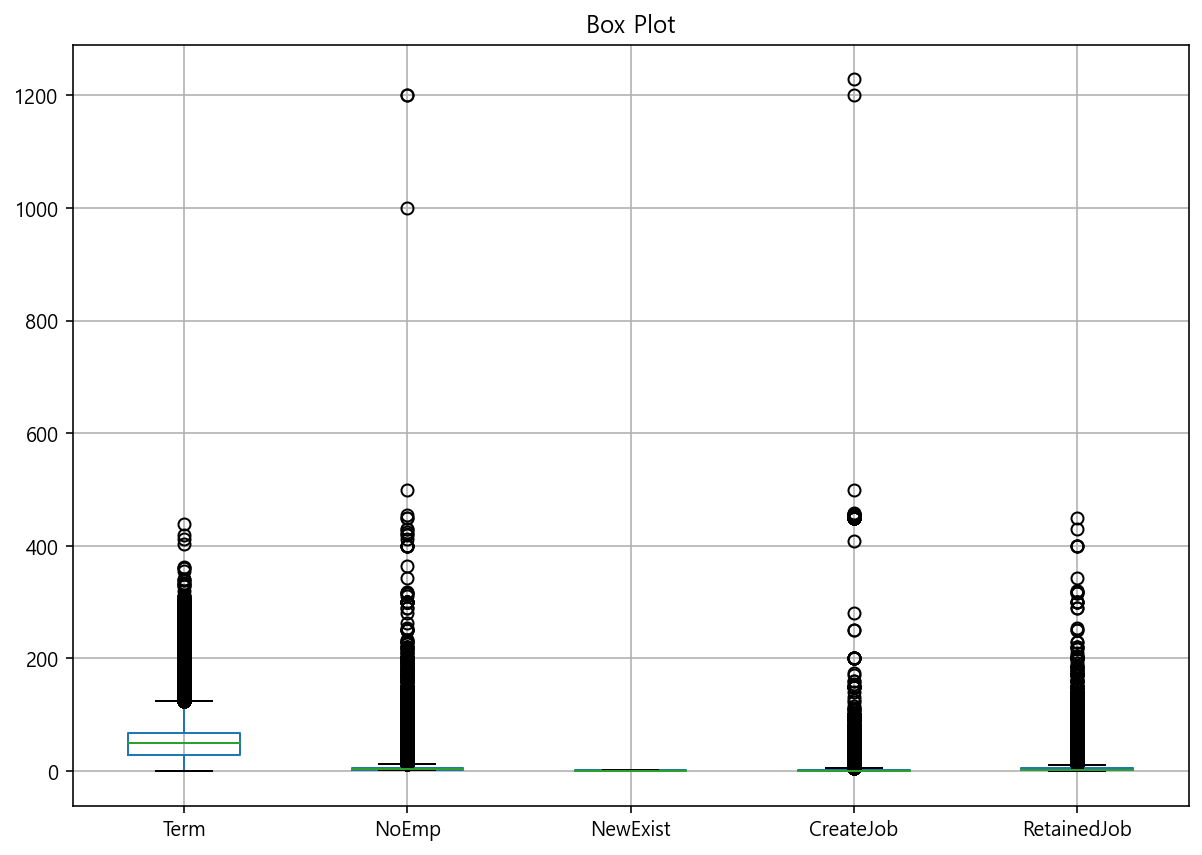

In [12]:
#matplotlib을 이용한 BoxPlot
plt.figure(figsize=(10, 7))
df1.boxplot(column=['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob'])
plt.title("Box Plot")
plt.show()

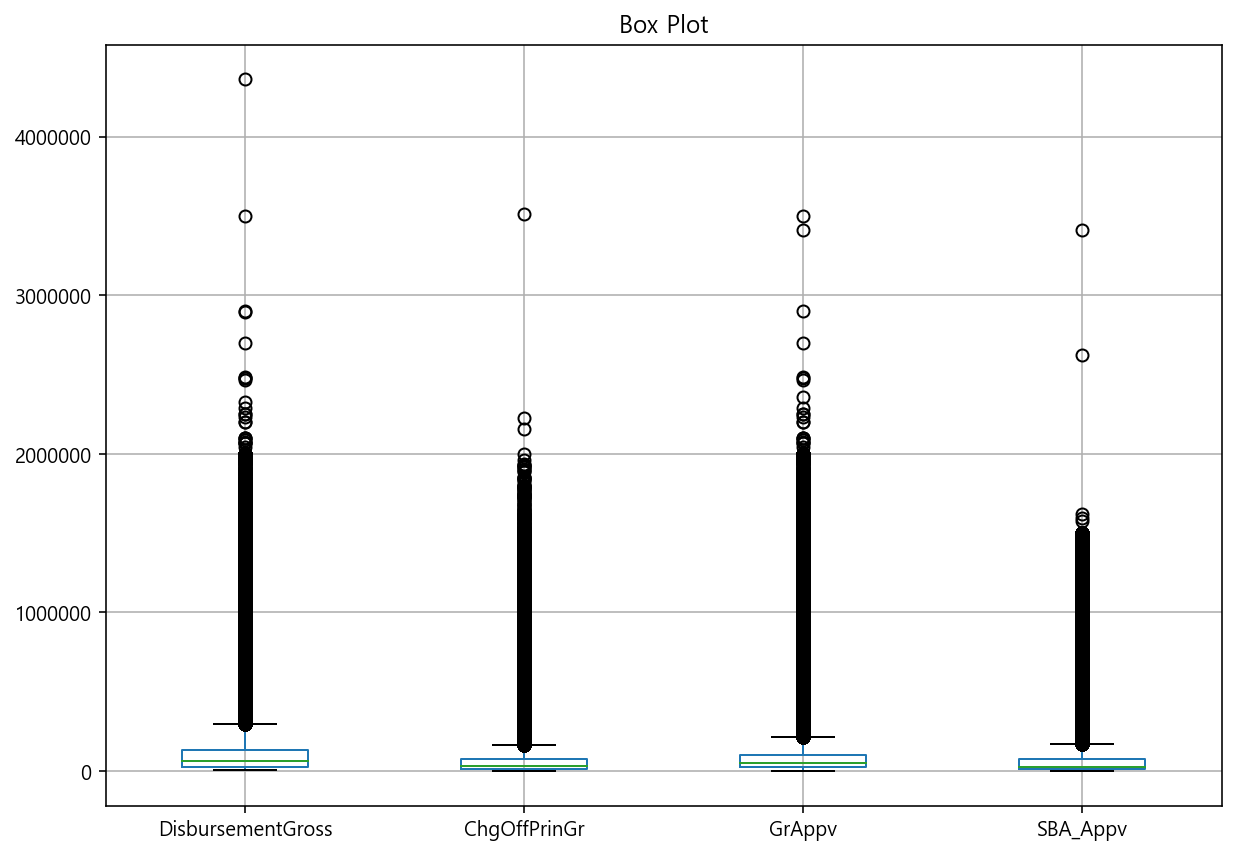

In [23]:
#matplotlib을 이용한 BoxPlot
plt.figure(figsize=(10, 7))
df1.boxplot(column=['DisbursementGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv'])
plt.ticklabel_format(style='plain', axis='y') # 왼쪽 축의 표시 형식 변경
plt.title("Box Plot")
plt.show()

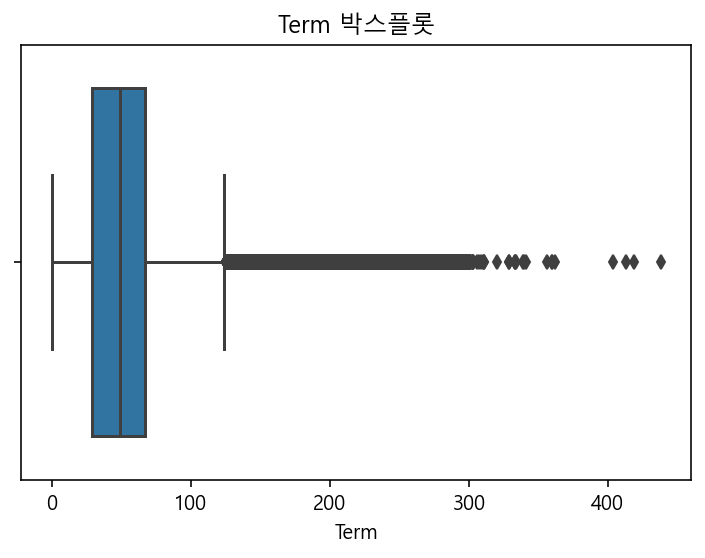

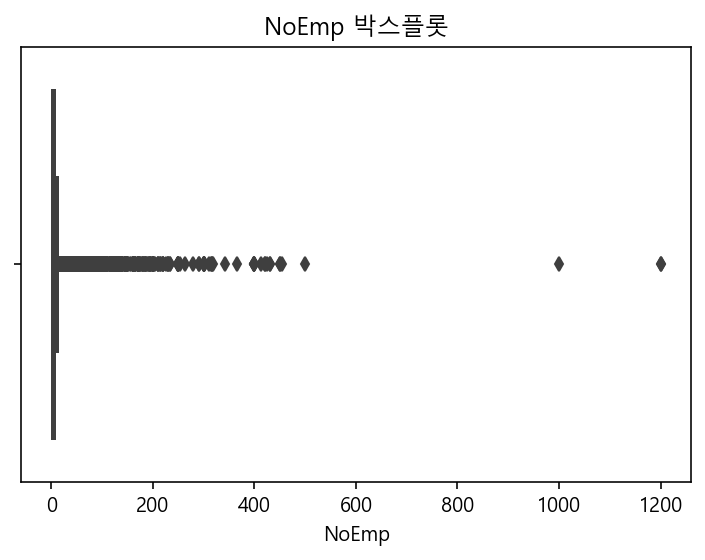

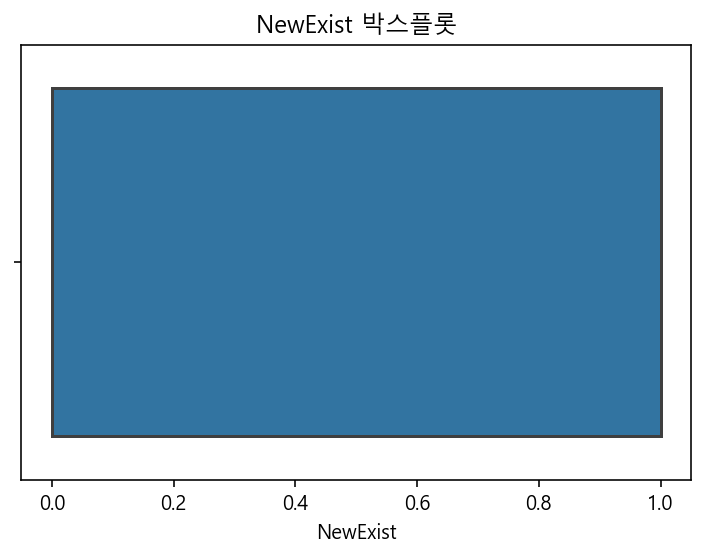

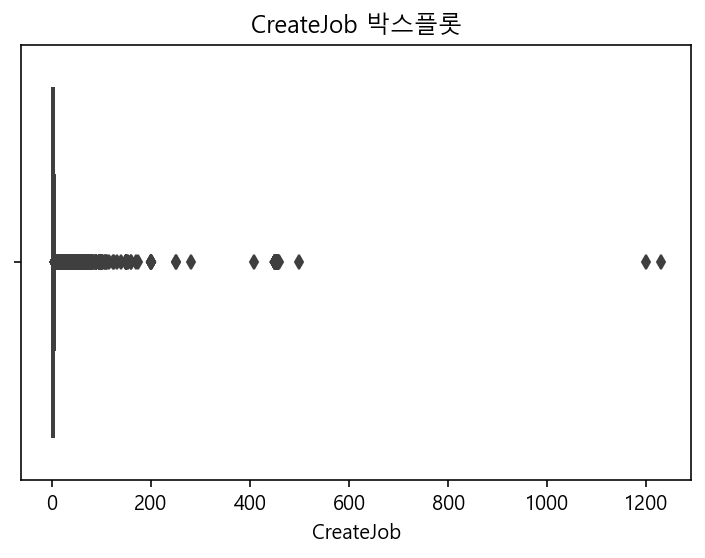

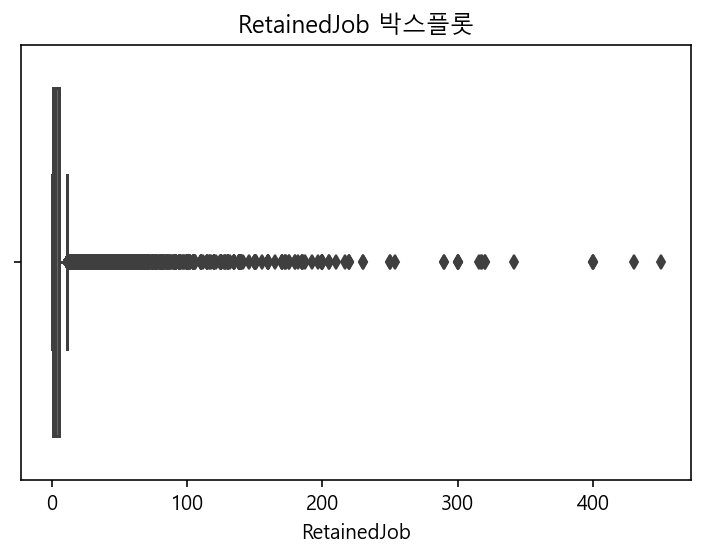

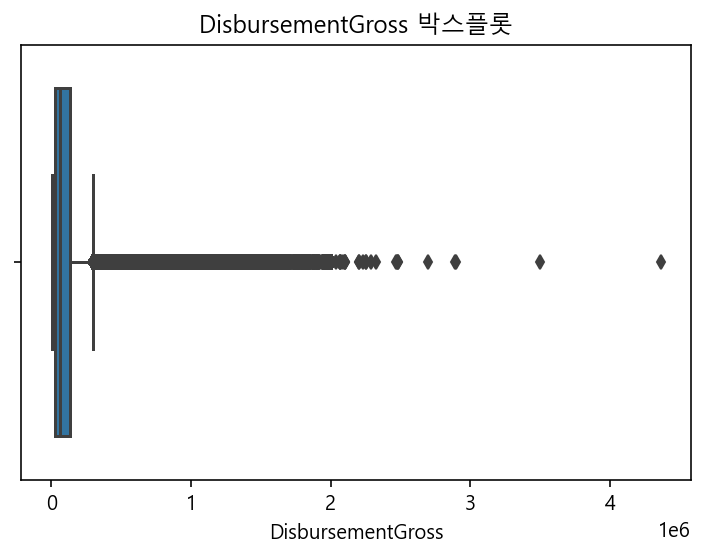

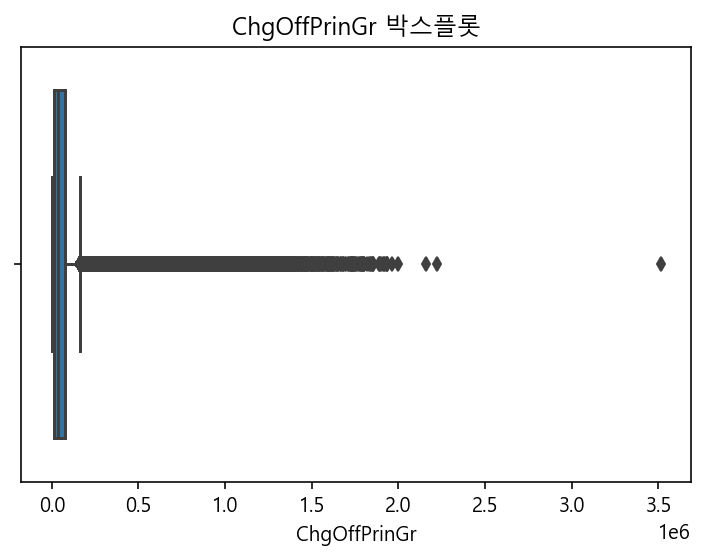

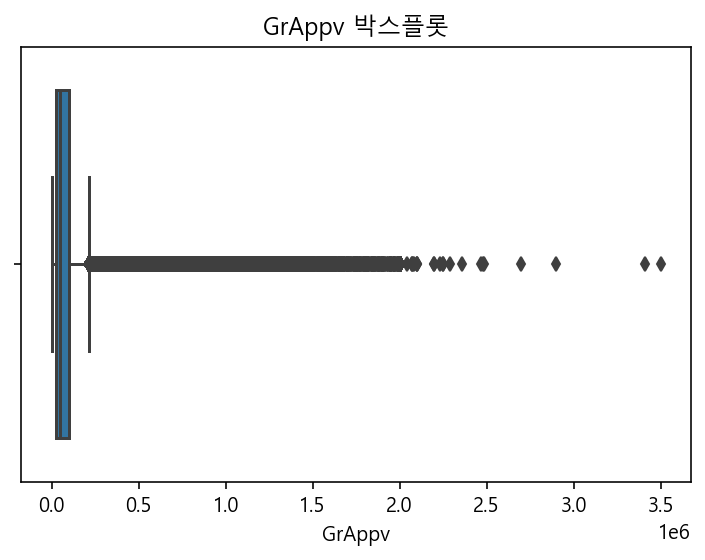

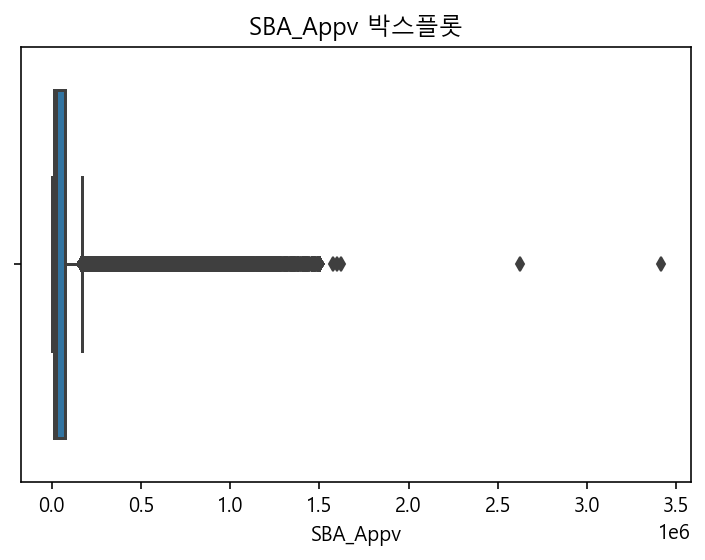

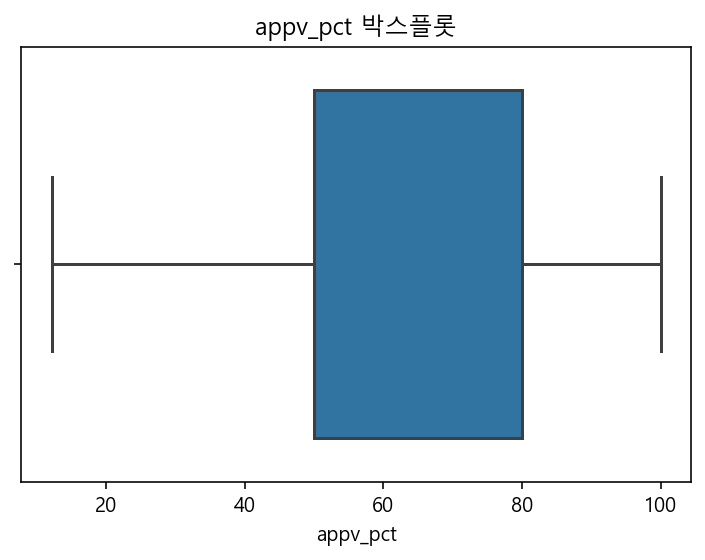

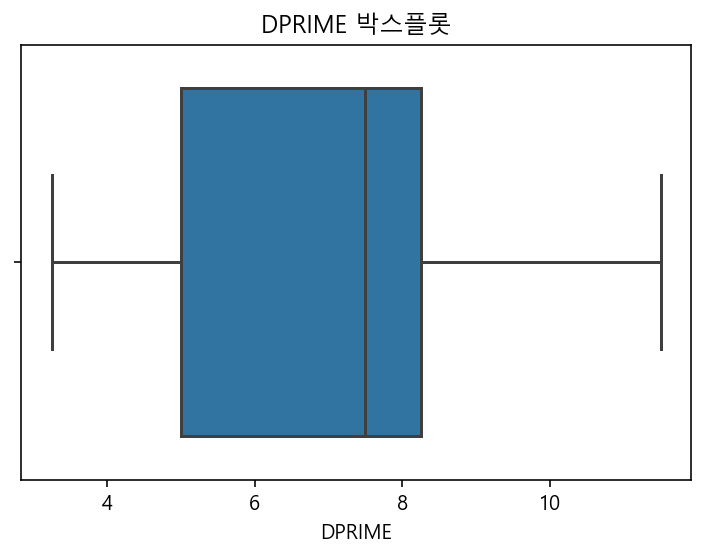

In [24]:
for column in ['Term','NoEmp','NewExist','CreateJob','RetainedJob','DisbursementGross','ChgOffPrinGr','GrAppv', 'SBA_Appv','appv_pct','DPRIME']:
    sns.boxplot(x=column, data=df1)
    plt.title('{} 박스플롯'.format(column))
    plt.show()

## 6. 상관계수 확인

In [28]:
# 변수 간 상관계수 계산
cor = df1[['Term','NoEmp','NewExist','CreateJob','RetainedJob','DisbursementGross','ChgOffPrinGr','GrAppv', 'SBA_Appv','appv_pct','DPRIME']].corr()
cor

,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,appv_pct,DPRIME
Term,1.000000,0.080032,0.076308,0.027164,-0.010755,0.475243,0.442487,0.514150,0.527438,0.315161,0.091341
NoEmp,0.080032,1.000000,-0.077962,0.146306,0.585135,0.284489,0.244854,0.281641,0.275913,0.048310,0.037621
NewExist,0.076308,-0.077962,1.000000,0.056046,-0.110000,0.002834,0.024656,0.024012,0.038475,0.232280,0.048496
CreateJob,0.027164,0.146306,0.056046,1.000000,0.137042,0.074374,0.085316,0.073752,0.071707,0.015750,-0.005045
RetainedJob,-0.010755,0.585135,-0.110000,0.137042,1.000000,0.162586,0.150385,0.141857,0.127584,-0.111779,-0.026765
DisbursementGross,0.475243,0.284489,0.002834,0.074374,0.162586,1.000000,0.882338,0.974846,0.955444,0.158787,0.072884
ChgOffPrinGr,0.442487,0.244854,0.024656,0.085316,0.150385,0.882338,1.000000,0.892175,0.883995,0.182887,0.058693
GrAppv,0.514150,0.281641,0.024012,0.073752,0.141857,0.974846,0.892175,1.000000,0.987416,0.220394,0.061448
SBA_Appv,0.527438,0.275913,0.038475,0.071707,0.127584,0.955444,0.883995,0.987416,1.000000,0.285438,0.057750
appv_pct,0.315161,0.048310,0.232280,0.015750,-0.111779,0.158787,0.182887,0.220394,0.285438,1.000000,-0.016886


Text(0.5, 1.0, '상관계수 히트맵')

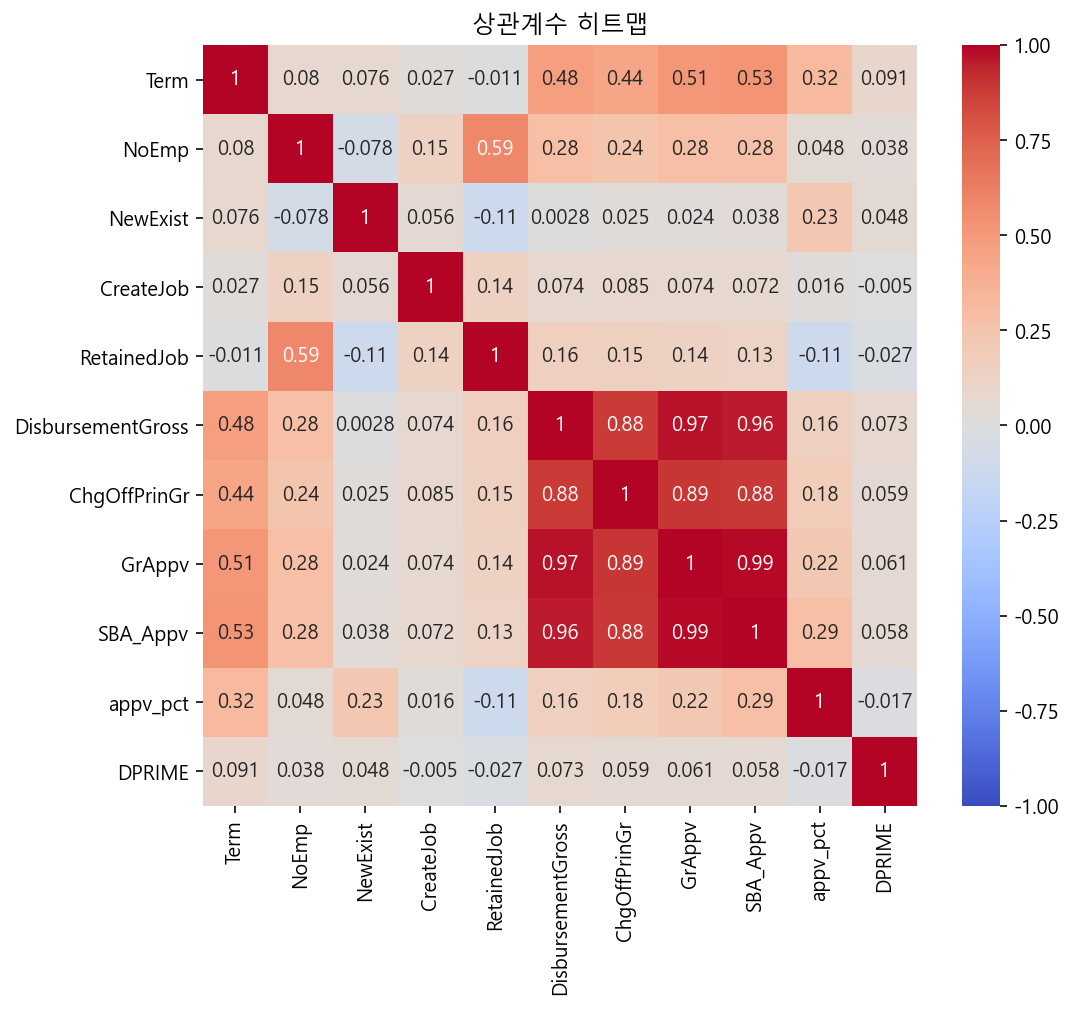

In [29]:
# 히트맵 시각화
plt.figure(figsize=(8,7)) #사이즈 조정
sns.heatmap(cor, cmap="coolwarm", annot=True, vmin=-1,vmax=1)
plt.title('상관계수 히트맵')

Text(0.5, 1.0, '상관계수 히트맵')

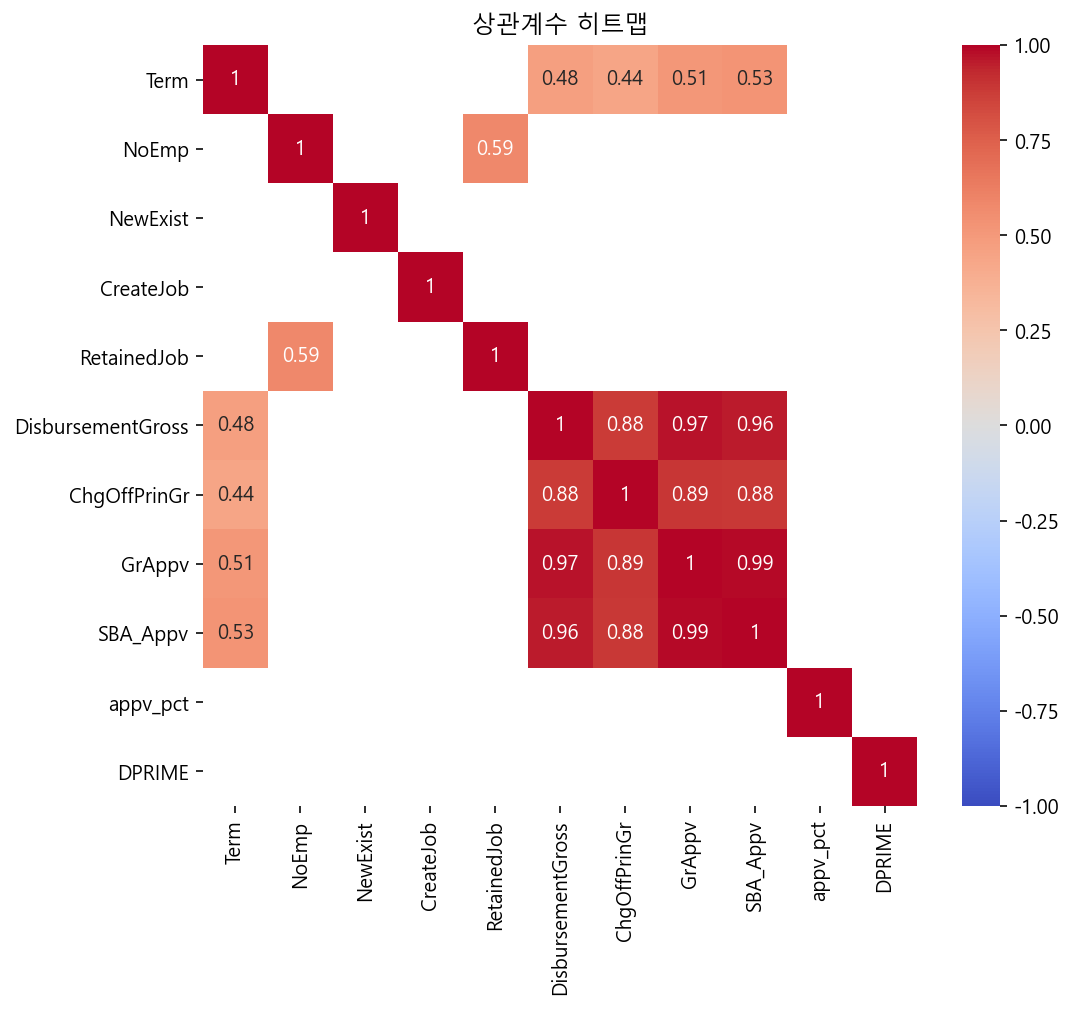

In [30]:
# 히트맵에서 상관계수의 절댓값이 0.4 이상인 경우만 추출
plt.figure(figsize=(8,7))
sns.heatmap(cor[abs(cor) >= 0.4], cmap="coolwarm", annot=True, vmin=-1,vmax=1)
plt.title('상관계수 히트맵')

- 대출기간과 (대출금액, 청구금액, 은행 승인 대출금액, SBA 승인 대출금액) 사이에 강한 양의 상관관계가 존재한다.
- 직원 수와 기존 직원 수 사이에 강한 양의 상관관계가 존재한다.
- 대출 금액과 (청구금액, 은행 승인 대출금액, SBA 승인 대출금액) 사이에 뚜렷한 양의 상관관계가 존재한다.
- 청구금액과 (은행 승인 대출금액, SBA 승인 대출금액) 사이에 뚜렷한 양의 상관관계가 존재한다.
- 은행 승인 대출금액과 SBA 승인 대출금액 사이에 뚜렷한 양의 상관관계가 존재한다.

## 7. 변수별 분포 확인

### 7.1 범주형 변수

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148720 entries, 12 to 864702
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      148720 non-null  int64  
 1   Name               148720 non-null  object 
 2   City               148720 non-null  object 
 3   State              148720 non-null  object 
 4   Zip                148720 non-null  int64  
 5   Bank               148720 non-null  object 
 6   BankState          148720 non-null  object 
 7   NAICS              148720 non-null  int64  
 8   ApprovalDate       148720 non-null  object 
 9   ApprovalFY         148720 non-null  int64  
 10  Term               148720 non-null  int64  
 11  NoEmp              148720 non-null  int64  
 12  NewExist           148720 non-null  int64  
 13  CreateJob          148720 non-null  int64  
 14  RetainedJob        148720 non-null  int64  
 15  FranchiseCode      148720 non-null  int64  
 16  U

#### (1) Name : 차용 기업명

In [12]:
df1.Name

12                FAMILY CARPET CLEANING
55        CONTRACT CONNECTIONS INDUSTRIE
76        PRECISION TUNE AUTO SERVICE CE
157                    JOSIES RESTAURANT
183       STEPHEN & ASSOCIATES BUILDERS,
                       ...              
864639              D & C CLEANERS, INC.
864648    THE PRINTING PROFESSIONALS,INC
864696                        DAD'S INC.
864699                GLOBAL DRUGS, INC.
864702           DAEDALUS RESEARCH, INC.
Name: Name, Length: 148720, dtype: object

In [13]:
len(df1.Name.unique())

137793

=> 고유값의 개수(137793)가 df1 행의 개수와 일치하지 않으므로 2회 이상 빌린 기업이 있다고 볼 수 있다.

In [14]:
# 중복된 이름 추출
duplicate_names = df1[df1.duplicated(['Name'], keep=False)]
duplicate_names

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate2,Term_re,smallmedium,createjob2,retainedjob2,dis_re,appv_pct,DPRIME,dprime2,growth_potential
186,1692734007,"NERAKO ENTERPRISES, INC.",CANTON,OH,44709,THE HUNTINGTON NATIONAL BANK,OH,5,1997-11-20,1998,...,1999-02-28,0,0,0,0,3,75.0,7.75,0,1
187,1694814000,QUIZNO'S CLASSIC SUBS,AUSTIN,TX,78750,UNION STATE BANK,TX,10,1997-11-21,1998,...,2002-10-10,0,0,0,0,2,80.0,7.75,0,1
262,1816284006,SHARINNA'S POLISH DELI & BAKER,MANISTEE,MI,49660,FIFTH THIRD BANK,OH,13,1998-02-02,1998,...,2017-02-23,2,0,0,0,3,75.0,7.75,0,2
263,1816444006,SHARINNA'S POLISH DELI & BAKER,MANISTEE,MI,49660,FIFTH THIRD BANK,OH,20,1998-02-02,1998,...,2004-10-29,1,0,0,0,3,75.0,7.75,0,2
614,2207764007,CRAWFORD PRODUCTS,NEW SMYRNA BEACH,FL,32168,"TD BANK, NATIONAL ASSOCIATION",FL,14,1998-07-22,1998,...,1999-08-27,0,0,0,0,2,75.0,7.75,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863911,9727903000,JODY'S,BELFAIR,WA,98528,KITSAP BANK,WA,13,1996-11-04,1997,...,1999-06-19,0,0,0,0,3,80.0,8.25,0,2
864212,9781103008,INITIAL IDEAS,SNYDER,TX,79549,COMMUNITY BANK OF SNYDER,TX,14,1996-11-21,1997,...,1999-11-16,0,0,0,0,2,80.0,8.25,0,2
864240,9789133000,MVP & GRILL,RANCHO CUCAMONGA,CA,91738,UMPQUA BANK,OR,2,1996-11-25,1997,...,2004-05-23,1,0,0,0,2,80.0,8.25,0,2
864319,9802413007,"QUAIL COUNTRY INN, INC.",CLINTON CORNERS,NY,12514,NEWTEK SMALL BUS. FINANCE INC.,NY,13,1996-11-29,1997,...,2004-12-19,1,0,0,0,1,75.0,8.25,0,2


In [15]:
# 가장 많이 빌린 기업명 확인
duplicate_names['Name'].value_counts()

COLD STONE CREAMERY               99
MATCO TOOLS                       84
QUIZNO'S SUBS                     83
SUBWAY                            66
QUIZNO'S                          60
                                  ..
J FREY DIVERSIFIED                 2
Flinthill Cottage Bed & Breakf     2
PRO-BIND, INC.                     2
BLESSED LITTLE CHILDREN'S DAY      2
BAILEY TRUCKING                    2
Name: Name, Length: 7883, dtype: int64

=> 가장 많이 빌린 기업은 COLD STONE CREAMERY(아이스크림), MATCO TOOLS(도구), QUIZNO'S SUB(샌드위치) 

#### (2) City : 차용 기업이 위치한 도시

In [16]:
df1.City

12            NEW CASTLE
55               HATBORO
76          JACKSONVILLE
157           HARTSVILLE
183        OKLAHOMA CITY
               ...      
864639      BOROUGH PARK
864648          CRANBURY
864696    SALT LAKE CITY
864699             BRONX
864702       NORTH LOGAN
Name: City, Length: 148720, dtype: object

In [18]:
df1.City.value_counts()

LOS ANGELES     3067
HOUSTON         2084
MIAMI           1840
NEW YORK        1658
CHICAGO         1562
                ... 
Copake             1
BETHUNE            1
E. FAIRFIELD       1
Northvale          1
AMERICAN CYN       1
Name: City, Length: 14484, dtype: int64

=> 로스엔젤리스, 휴스턴, 마이애미의 경우 채무불이행 건수가 높게 나타났다. 

#### (3) State : 차용 기업이 위치한 주

In [19]:
df1.State

12        DE
55        PA
76        FL
157       SC
183       OK
          ..
864639    NY
864648    NJ
864696    UT
864699    NY
864702    UT
Name: State, Length: 148720, dtype: object

In [21]:
# State 빈도 분석(가장 높은 3곳 추출)
df1.State.value_counts().head(3)

CA    23240
TX    12254
NY    11058
Name: State, dtype: int64

=> 캘리포니아, 텍사스, 뉴욕 순으로 채무불이행 건수가 높게 나타났다.

#### (4) Bank : 은행명

In [22]:
df1.Bank

12        PNC BANK, NATIONAL ASSOCIATION
55        PNC BANK, NATIONAL ASSOCIATION
76                          REGIONS BANK
157          WELLS FARGO BANK NATL ASSOC
183       BANK OF OKLAHOMA A DIVISION OF
                       ...              
864639     TD BANK, NATIONAL ASSOCIATION
864648       WELLS FARGO BANK NATL ASSOC
864696                  BANK OF THE WEST
864699            HSBC BK USA NATL ASSOC
864702                 CACHE VALLEY BANK
Name: Bank, Length: 148720, dtype: object

In [23]:
df1.Bank.value_counts()

BANK OF AMERICA NATL ASSOC        23239
JPMORGAN CHASE BANK NATL ASSOC    12701
BBCN BANK                         12328
CAPITAL ONE NATL ASSOC             9129
WELLS FARGO BANK NATL ASSOC        8342
                                  ...  
VISIONS FCU                           1
PROSPERA CU                           1
BNA BANK                              1
FINANCIAL RES. MGMT INC-NCNB-T        1
CITIZENS BANK OF ELDON                1
Name: Bank, Length: 3092, dtype: int64

=> NATIONAL BANK의 빈도가 많은 편이다.

#### (5) SameState : 기업 State와 은행 State 동일 여부(0=동일하지 않음, 1=동일함)

In [24]:
df1.SameState

12        1
55        0
76        1
157       0
183       1
         ..
864639    0
864648    0
864696    1
864699    0
864702    1
Name: SameState, Length: 148720, dtype: int64

In [25]:
df1.SameState.value_counts()

0    104195
1     44525
Name: SameState, dtype: int64

In [29]:
104195/len(df1)*100

70.06118881118881

- **은행의 State과 기업 State가 다른 경우(0)가 전체 데이터의 70% 차지!**
- **이를 통해 은행과 기업 사이의 정보 비대칭 문제로 인해 채무 불이행율이 높게 나타났다고 볼 수 있다.**

#### (6) NAICS : 북미 산업 분류 체계 코드

- 01 : 숙박 및 요식업
- 02 : 폐기물 관리업
- 03 : 농, 임, 어업
- 04 : 엔터테인먼트
- 05 : 건설업
- 06 : 교육 서비스
- 07 : 재무 및 보험
- 08 : 의료
- 09 : 정보산업
- 10 : 제조업
- 11 : 메니지먼트
- 12 : 광업
- 13 : 기타 서비스
- 14 : 과학 및 전문산업
- 15 : 행정
- 16 : 부동산업
- 17 : 소매업
- 18 : 운송업
- 19 : 공익사업
- 20 : 도매업

In [31]:
df1.NAICS

12         2
55         1
76        13
157       14
183        2
          ..
864639    13
864648    17
864696     5
864699    17
864702    10
Name: NAICS, Length: 148720, dtype: int64

In [34]:
df1.NAICS.value_counts().head(5)

17    30288
5     16253
1     15513
13    15076
14    13703
Name: NAICS, dtype: int64

=> 소매업, 건설업, 숙박 및 요식업, 기타 서비스, 과학 및 전문산업 순으로 채무불이행율이 높게 나타났다.

#### (7) Recession : 글로벌 금융위기 시기 여부(0=해당하지 않음, 1=해당)

In [35]:
df1.Recession

12        0
55        0
76        0
157       0
183       0
         ..
864639    0
864648    0
864696    0
864699    0
864702    0
Name: Recession, Length: 148720, dtype: int64

In [41]:
# 채무 이행 데이터
df2.Recession.value_counts()

0    694248
1     21779
Name: Recession, dtype: int64

In [42]:
21779/len(df2)*100

3.041645077629754

In [43]:
# 채무 불이행 데이터
df1.Recession.value_counts() 

0    137381
1     11339
Name: Recession, dtype: int64

In [44]:
11339/len(df1)*100

7.624394835933297

=> 글로벌 금융위기 시기에 해당하는 채무 불이행 건수는 약 1만 1천 건으로, 전체(df1)의 7.7% 차지

#### (8) NewExist : 0=기존 비즈니스, 1=신규비즈니스
- 데이터 설명자료를 통해 기존 비즈니스는 2년 이상, 신규 비즈니스는 2년 미만을 의미

In [46]:
df1.NewExist

12        0
55        1
76        0
157       1
183       0
         ..
864639    1
864648    0
864696    1
864699    1
864702    0
Name: NewExist, Length: 148720, dtype: int64

In [47]:
df1.NewExist.value_counts()

0    104700
1     44020
Name: NewExist, dtype: int64

=> 기존 비즈니스의 경우가 신규 비즈니스에 비해 채무 불이행율이 높게 나타났다.

#### (9) FranchiseCode : 프랜차이즈 여부 (0=아님, 1=프랜차이즈)

In [48]:
df1.FranchiseCode

12        0
55        0
76        1
157       0
183       0
         ..
864639    0
864648    0
864696    0
864699    0
864702    0
Name: FranchiseCode, Length: 148720, dtype: int64

In [49]:
df1.FranchiseCode.value_counts()

0    141243
1      7477
Name: FranchiseCode, dtype: int64

=> 프랜차이즈가 아닌 경우가 프랜차이즈인 경우에 비해 채무 불이행율이 높게 나타났다.

#### (10) UrbanRural : 도시/농촌 여부(0=도시, 1=농촌)

In [51]:
df1.UrbanRural

12        1
55        0
76        0
157       1
183       1
         ..
864639    0
864648    0
864696    1
864699    0
864702    1
Name: UrbanRural, Length: 148720, dtype: int64

In [52]:
df1.UrbanRural.value_counts()

0    87636
1    61084
Name: UrbanRural, dtype: int64

=> 도시의 채무불이행율이 농촌의 채무불이행율보다 높게 나타났다.

#### (11) LowDoc : SBA 대출프로그램 신청 여부(0=No, 1=Yes)

In [53]:
df1.LowDoc

12        0
55        0
76        0
157       0
183       0
         ..
864639    1
864648    1
864696    0
864699    1
864702    0
Name: LowDoc, Length: 148720, dtype: int64

In [54]:
df1.LowDoc.value_counts()

0    138853
1      9867
Name: LowDoc, dtype: int64

- **대출 프로그램을 신청하지 않은 경우가 신청한 경우에 비해 채무불이행율이 높다고 볼 수 있다.**
- **따라서 SBA 대출 프로그램을 신청하는 기업에 한해서 우대 조건을 붙여 대출상품을 파는 건 어떤가?**

### 7.2 수치형 변수

#### (12) Term : 대출 기간(개월), Term_re : 대출 기간 범주화

도메인 지식
- 일반적으로 장기일수록 돈을 못 갚을 확률이 높다. 따라서 장기 금리가 단기 금리에 비해 높다.
- 그러나 장기 금리보다 단기 금리가 높아지는 현상이 발생하기도 하는데, 이는 금리역전현상을 의미한다. 거시경제 연구 분야에서는 이를 심각하게 받아들인다.

In [55]:
df1.Term

12         49
55         69
76         33
157        59
183        23
         ... 
864639    120
864648     27
864696    183
864699     44
864702     79
Name: Term, Length: 148720, dtype: int64

In [56]:
df1.Term.value_counts()

60     2138
54     2136
42     2113
61     2107
53     2100
       ... 
340       1
341       1
356       1
438       1
309       1
Name: Term, Length: 323, dtype: int64

In [57]:
df1['Term_re']

12        0
55        1
76        0
157       0
183       0
         ..
864639    1
864648    0
864696    2
864699    0
864702    1
Name: Term_re, Length: 148720, dtype: int64

- 단기 : 5년 미만(0)
- 중기 : 5년 이상 15년 미만(1)
- 장기 : 15년 이상(2)

In [59]:
df1['Term_re'].value_counts()

0    98574
1    45242
2     4904
Name: Term_re, dtype: int64

**일반적인 상황과 반대!**
- 일반적으로 장기(2)인 경우가 채무불이행율이 높을 것이라 예상했지만, 예상과 달리 단기인 경우가 채무불이행율이 더 높게 나타났다.
- 이는 중소기업의 경우 만기가 도달했을 때 비즈니스가 성장하여 상환 능력이 더욱 커졌다고 해석할 수 있다.

#### (13) NoEmp : 직원 수, smallmedium : 기업 규모 범주화(0=소기업, 1=중기업)

In [60]:
df1.NoEmp

12         1
55        24
76         6
157        2
183       40
          ..
864639     3
864648     3
864696    11
864699     5
864702    32
Name: NoEmp, Length: 148720, dtype: int64

In [62]:
df1.NoEmp.value_counts().head(5)

1    33983
2    27469
3    17896
4    13849
5    10953
Name: NoEmp, dtype: int64

=> 직원 수 빈도분석 결과, 1명~5명과 같이 직원의 수가 적은 경우 채무불이행율이 높게 나타났다. (합당한 결과)

In [63]:
df1.smallmedium

12        0
55        0
76        0
157       0
183       0
         ..
864639    0
864648    0
864696    0
864699    0
864702    0
Name: smallmedium, Length: 148720, dtype: int64

In [64]:
df1.smallmedium.value_counts()

0    148716
1         4
Name: smallmedium, dtype: int64

=> 소기업인 경우의 채무불이행율이 압도적으로 높게 나타났다.

#### (14) : CreateJob : 신규 직원 수, createjob2 : 신규 직원 수 범주화

In [65]:
df1.CreateJob

12        0
55        0
76        0
157       0
183       0
         ..
864639    0
864648    0
864696    0
864699    0
864702    0
Name: CreateJob, Length: 148720, dtype: int64

In [67]:
df1.CreateJob.value_counts().head(5)

0    91825
1    18450
2    15067
3     6493
4     4025
Name: CreateJob, dtype: int64

=> 신규 직원 수가 0명인 경우의 채무 불이행율이 가장 높았으며, 이외에도 1명~4명 순서대로 높게 나타났다.

In [68]:
df1.createjob2

12        0
55        0
76        0
157       0
183       0
         ..
864639    0
864648    0
864696    0
864699    0
864702    0
Name: createjob2, Length: 148720, dtype: int64

- 0인~3인 : 0
- 4인~20인 : 1
- 21인 이상 : 2

In [69]:
df1.createjob2.value_counts()

0    131835
1     15516
2      1369
Name: createjob2, dtype: int64

=> 압도적으로 신규 직원 수가 0~3인에 해당하는 기업이 채무불이행율이 높게 나타났다.

#### (15) RetainedJob : 기존 직원 수, retainedjob2 : 기존 직원 수 범주화

In [70]:
df1.RetainedJob

12        0
55        0
76        0
157       0
183       0
         ..
864639    0
864648    0
864696    0
864699    0
864702    0
Name: RetainedJob, Length: 148720, dtype: int64

In [73]:
df1.RetainedJob.value_counts().head(5)

0    35634
1    25923
2    20825
3    14054
4    10996
Name: RetainedJob, dtype: int64

=> 기존 직원 수 역시 0~4명인 경우가 채무 불이행율이 높게 나타났다.

In [75]:
df1[['CreateJob','RetainedJob','NoEmp']]

,CreateJob,RetainedJob,NoEmp
12,0,0,1
55,0,0,24
76,0,0,6
157,0,0,2
183,0,0,40
...,...,...,...
864639,0,0,3
864648,0,0,3
864696,0,0,11
864699,0,0,5


=> NoEmp는 CreateJob + RetainedJob이 아닌 것을 확인할 수 있음.

따라서 기존 직원 수도 어떤 계산 방식에 의해 산정이 되는 것이라 0명이 나올 수 있다고 보았음.

- 0인~3인 : 0
- 4인~20인 : 1
- 21인 이상 : 2

In [77]:
df1.retainedjob2.value_counts()

0    96436
1    47462
2     4822
Name: retainedjob2, dtype: int64

=> 기존 직원 수 역시 0~3인에 해당하는 기업이 채무불이행율이 가장 높게 나타났다.

#### (16) DisbursementGross : 지급된 금액, dis_re : 범주화

In [78]:
df1.DisbursementGross

12         40000
55        187500
76        175000
157       218500
183       200000
           ...  
864639    100000
864648     60000
864696    500000
864699    100000
864702    600000
Name: DisbursementGross, Length: 148720, dtype: int64

In [79]:
df1.DisbursementGross.value_counts()

50000     9271
25000     6800
10000     5603
5000      5406
100000    5099
          ... 
142485       1
136338       1
132240       1
195727       1
16392        1
Name: DisbursementGross, Length: 43499, dtype: int64

- 1천만원 미만 : 0
- 1천만원 이상 ~ 5천만원 미만 : 1
- 5천만원 이상 ~ 1억 미만 : 2
- 1억 이상 ~ 5억 미만 : 3
- 5억 이상 ~ 10억 미만 : 4
- 10억 이상 : 5

In [80]:
df1.dis_re

12        1
55        3
76        3
157       3
183       3
         ..
864639    3
864648    2
864696    4
864699    3
864702    4
Name: dis_re, Length: 148720, dtype: int64

In [81]:
df1.dis_re.value_counts()

1    50838
3    44980
2    37529
0     7530
4     5583
5     2260
Name: dis_re, dtype: int64

=> 채무불이행 기업의 대출 금액은 대부분 1천만원 ~ 5천만원 미만이었다.

#### (17) ChgOffPrinGr : 청구된 금액(회수 불가능 금액)

In [82]:
df1.ChgOffPrinGr

12         14569
55         87366
76         97959
157        64073
183       139041
           ...  
864639     37293
864648     26267
864696    131179
864699     85170
864702    572315
Name: ChgOffPrinGr, Length: 148720, dtype: int64

In [83]:
df1.ChgOffPrinGr.value_counts()

50000     2084
10000     1734
35000     1318
25000     1291
100000    1016
          ... 
106616       1
69742        1
295569       1
75881        1
2049         1
Name: ChgOffPrinGr, Length: 78487, dtype: int64